In [3]:
#2024년 12월 1일
#commit 한 사람 : 이성은
#선수의 가치에 가장 큰 영향을 끼치는 요인은 무엇인가?
#확인을 위한 EDA 및 가설검정 시행

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("FIFA_train.csv")

데이터의 행렬의 수를 확인

In [7]:
data.shape

(8932, 12)

data의 column을 좀 편하게 보기 위해 T를 활용후 확인

In [8]:
data.head().T

,0,1,2,3,4
id,0,3,7,8,9
name,L. Messi,De Gea,L. Suárez,Sergio Ramos,J. Oblak
age,31,27,31,32,25
continent,south america,europe,south america,europe,europe
contract_until,2021,2020,2021,2020,2021
position,ST,GK,ST,DF,GK
prefer_foot,left,right,right,right,right
reputation,5.0,4.0,5.0,4.0,3.0
stat_overall,94,91,91,91,90
stat_potential,94,93,91,91,93


데이터의 타입, 결측치, 고유값 확인

In [10]:
def resumetable(df):
    print('데이터셋 형상: ', df.shape)
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary= summary.reset_index()
    summary = summary.rename(columns={'index':'feature'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고유값 개수'] = df.nunique().values

    return summary

resumetable(data)

데이터셋 형상:  (8932, 12)


,feature,데이터 타입,결측값 개수,고유값 개수
0,id,int64,0,8932
1,name,object,0,8932
2,age,int64,0,25
3,continent,object,0,5
4,contract_until,object,0,17
5,position,object,0,4
6,prefer_foot,object,0,2
7,reputation,float64,0,5
8,stat_overall,int64,0,46
9,stat_potential,int64,0,45


결측치 없음, 데이터의 기초 통계량 확인

In [12]:
data.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


# 데이터 전처리

ID와 name은 필요없기 때문에 제거

In [13]:
data.drop(['id', 'name'], axis = 1, inplace = True)

contract_until을 계약만료기간보다 남은계약기간으로 만들고 싶음

In [14]:
data['contract_until'].min()

'2018'

In [20]:
def con_period(x):
    if x == 'Dec 31, 2018' :
        return '2019'
    elif x == 'Jun 30, 2020' :
        return '2020.5'
    elif x == 'Jun 30, 2019' :
        return '2019.5'
    elif x == 'May 31, 2020' :
        return '2020.3333'
    elif x == 'May 31, 2019' :
        return '2019.3333'
    elif x == 'Jan 31, 2019' :
        return '2019.0833'
    elif x == 'Jan 1, 2019' :
        return '2019'
    elif x == 'Jan 12, 2019' :
        return '2019.034'
    elif x == 'Dec 31, 2019' :
        return '2020'
    elif x == 'Jun 1, 2019' :
        return '2019.416'
    else :
        return x

In [22]:
#남은 계약기간을 최소 1로 만들기 위해 -2017씩 진행

data.contract_until = data.contract_until.apply(con_period).astype('float64')
data.contract_until -= 2017

In [24]:
# 전처리 결과

data

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,4.0,ST,left,5.0,94,94,4.0,110500000.0
1,27,europe,3.0,GK,right,4.0,91,93,1.0,72000000.0
2,31,south america,4.0,ST,right,5.0,91,91,3.0,80000000.0
3,32,europe,3.0,DF,right,4.0,91,91,3.0,51000000.0
4,25,europe,4.0,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...
8927,18,africa,2.0,MF,right,1.0,48,63,3.0,60000.0
8928,19,europe,3.0,DF,right,1.0,47,59,2.0,40000.0
8929,18,south america,4.0,DF,right,1.0,47,64,2.0,50000.0
8930,18,europe,4.0,GK,right,1.0,47,65,1.0,50000.0


# EDA

분포를 먼저 그려봄

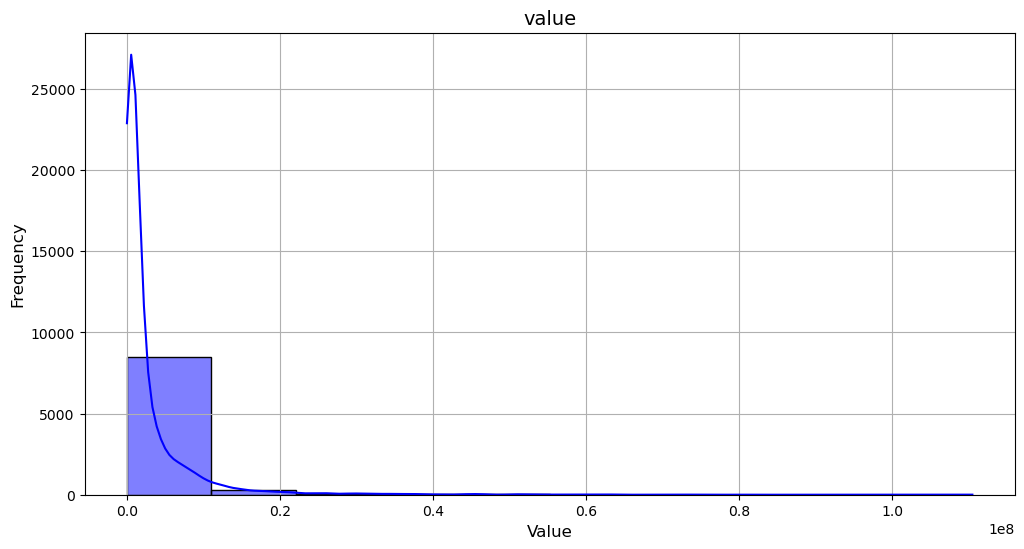

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(data['value'], kde=True, bins=10, color='blue')
plt.title('value', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

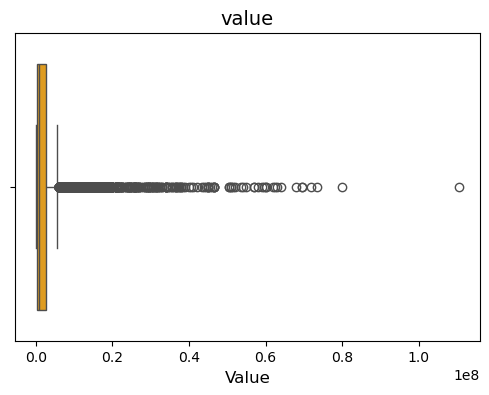

In [25]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['value'], color='orange')
plt.title('value', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.show()

분포가 너무 쏠려있어 확인이 어려워 로그변환 시도

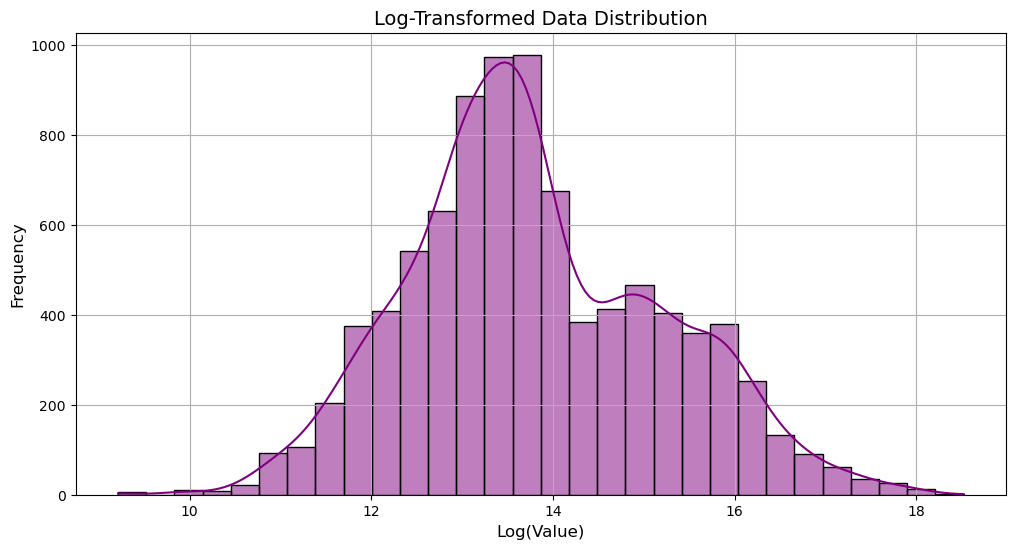

In [28]:
import numpy as np

data['value_log'] = np.log1p(data['value'])  # log1p는 log(1 + x)를 계산 (값이 0이어도 처리 가능)

# 로그 변환 후 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(data['value_log'], kde=True, bins=30, color='purple')
plt.title('Log-Transformed Data Distribution', fontsize=14)
plt.xlabel('Log(Value)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

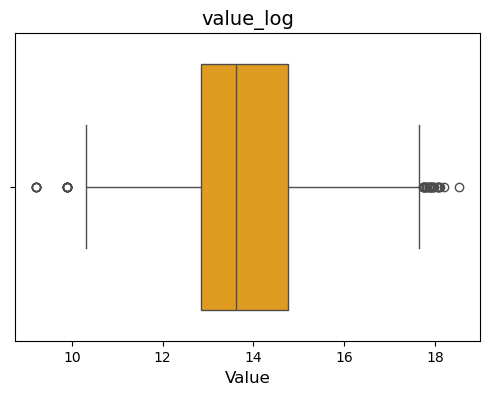

In [29]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['value_log'], color='orange')
plt.title('value_log', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.show()

각 변수별로 value와의 분포 확인(value의 분포가 이상치가 많고 왜도가 커보여 log변환을 활용)

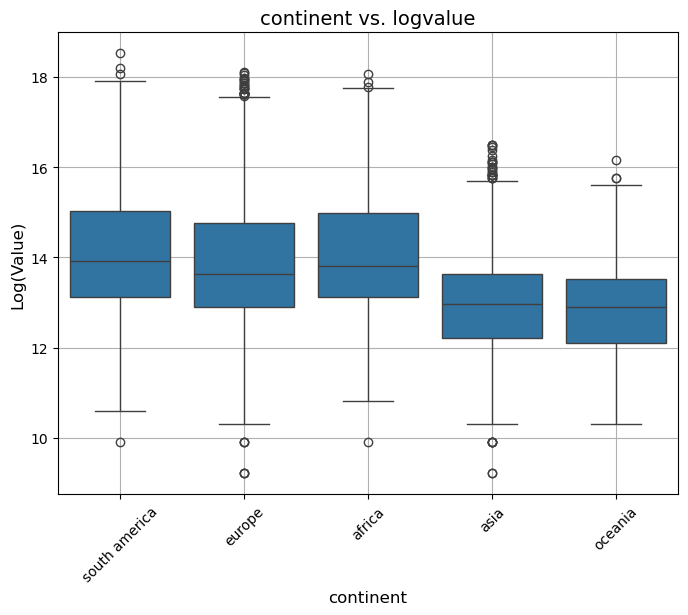

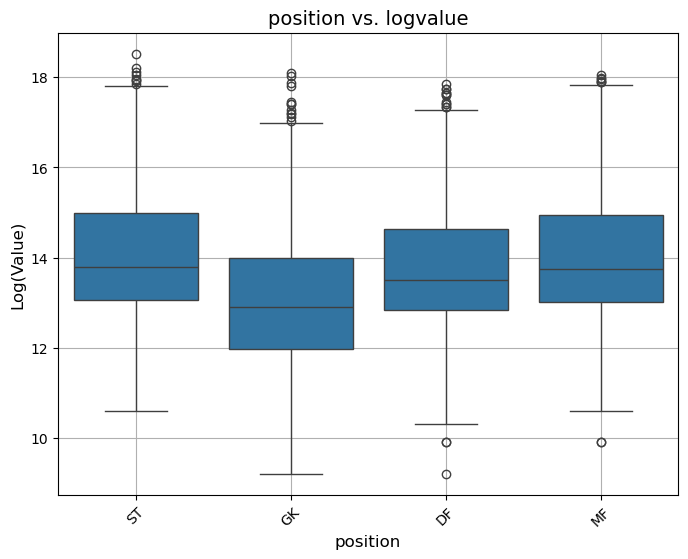

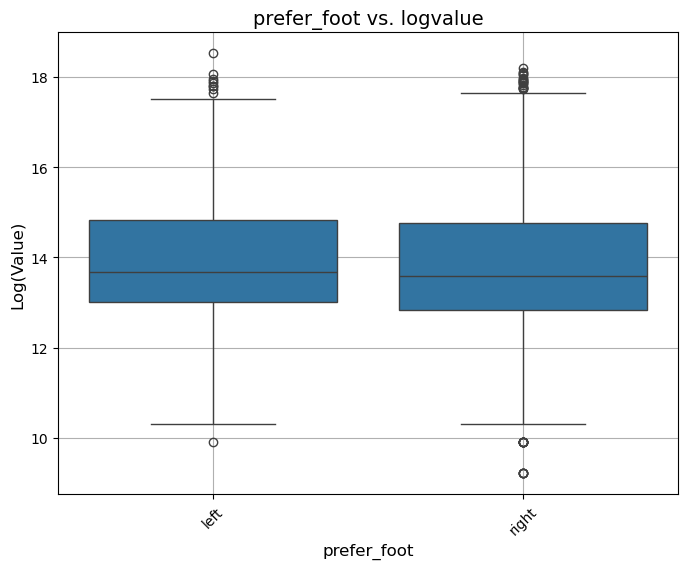

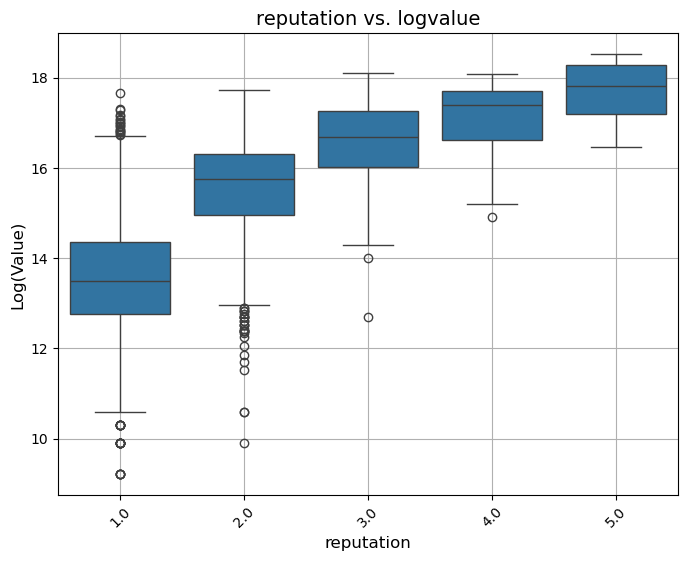

In [39]:
# 각 Feature와 logvalue 관계 시각화
categorical_features = ['continent', 'position', 'prefer_foot', 'reputation']  # 범주형 변수
numerical_features = ['age', 'stat_overall', 'stat_potential', 'stat_skill_moves']  # 수치형 but 이산형 변수
# 'contract_until'만 연속형으로 판단

# 1. 범주형 변수와 logvalue
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, y='value_log', data=data)
    plt.title(f'{feature} vs. logvalue', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Log(Value)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

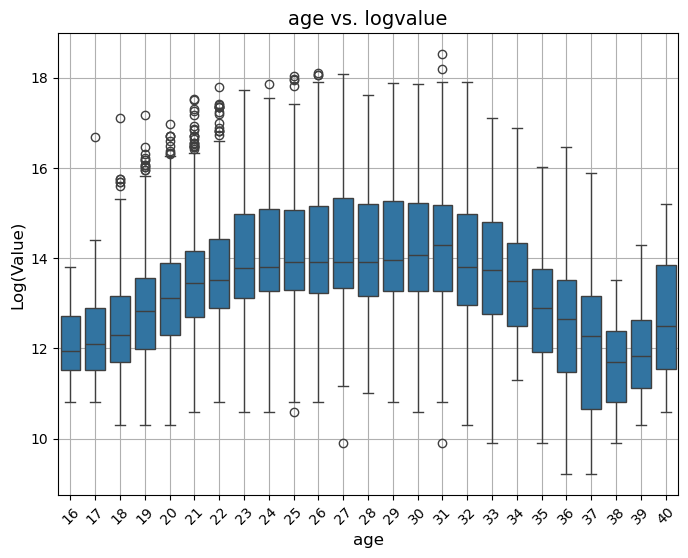

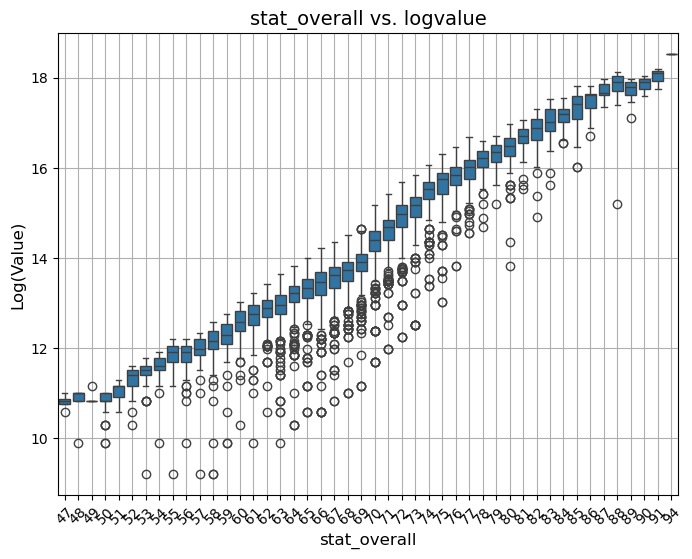

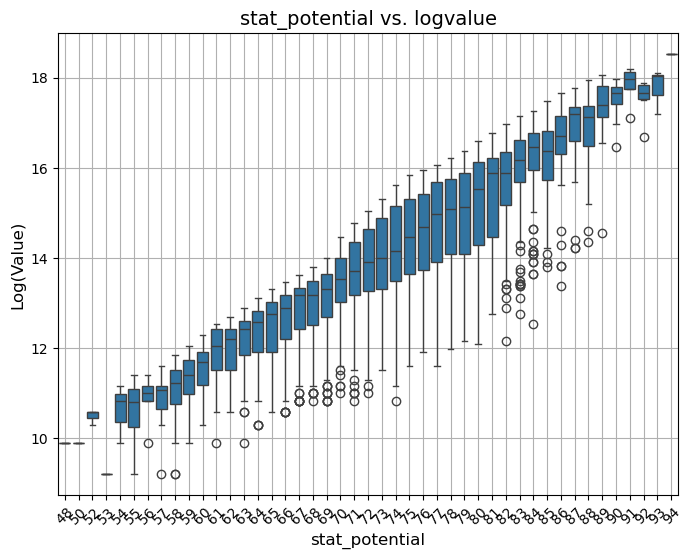

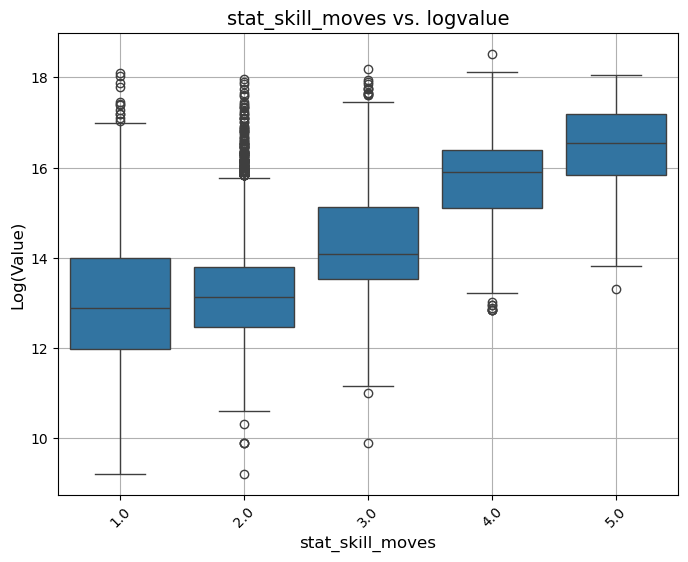

In [40]:
# 2. 수치형 변수와 logvalue
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=feature, y='value_log', data=data)
    plt.title(f'{feature} vs. logvalue', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Log(Value)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

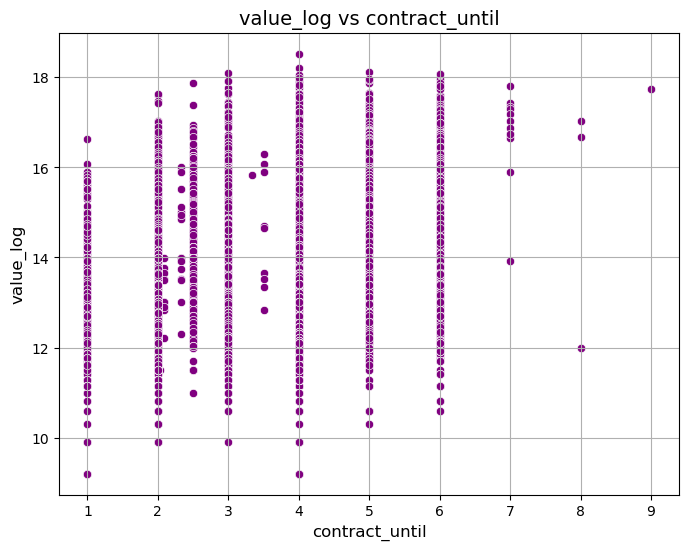

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='contract_until', y='value_log', data=data, color='purple')
plt.title('value_log vs contract_until', fontsize=14)
plt.xlabel('contract_until', fontsize=12)
plt.ylabel('value_log', fontsize=12)
plt.grid(True)
plt.show()

# 시각화 결과를 봤을 때는 대륙, 포지션(GK만 조금), 유명도, 나이, 능력치, 잠재력, 스킬에 따라 차이가 있는 것으로 보임 확실히 하기 위해 가설검정 시행

단순히 연관이 있는지만 확인하는게 아니라 어떤 feature가 가장 큰 영향을 주는지 확인하기 위해 Cramer’s V와 피어슨 상관분석 시행

In [41]:
# 범주형 데이터는 Cramer’s V 시행 (+ stat_skil_moves, unique가 너무 적어서)
cramer_column = ['continent', 'position', 'prefer_foot', 'reputation', 'stat_skill_moves']

# 수치형 변수 중 stat_skil_moves를 제외하고는 피어슨 상관계수 사용
fearson_column = ['age', 'stat_overall', 'stat_potential', 'contract_until'] 

In [45]:
from scipy.stats import chi2_contingency, pearsonr

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    k = min(contingency_table.shape)
    return np.sqrt(chi2 / (n * (k - 1)))

# 피어슨 상관계수 계산 함수
def pearson_corr(x, y):
    correlation, p_value = pearsonr(x, y)
    return correlation, p_value

In [46]:
# Cramer’s V 계산
print("Cramer’s V Results:")
for col in cramer_column:
    v = cramers_v(data[col], data['value_log'])
    print(f"{col}: Cramer’s V = {v:.3f}")

Cramer’s V Results:
continent: Cramer’s V = 0.178
position: Cramer’s V = 0.230
prefer_foot: Cramer’s V = 0.157
reputation: Cramer’s V = 0.648
stat_skill_moves: Cramer’s V = 0.416


In [48]:
# 피어슨 상관계수 계산
print("Pearson Correlation Results:")
for col in fearson_column:
    corr, p_value = pearson_corr(data[col], data['value_log'])
    print(f"{col}: Pearson Correlation = {corr:.3f}, p-value = {p_value:.3f}")

Pearson Correlation Results:
age: Pearson Correlation = 0.185, p-value = 0.000
stat_overall: Pearson Correlation = 0.939, p-value = 0.000
stat_potential: Pearson Correlation = 0.793, p-value = 0.000
contract_until: Pearson Correlation = 0.229, p-value = 0.000


# 결론 : 선수들의 몸값에 가장 큰 영향을 주는 feature는 선수의 능력치다!